In [1]:
import pandas as pd
import numpy as np

In [2]:
df = df = pd.read_csv("sms.csv",encoding='ISO-8859-1')
df.head()

,Unnamed: 0,spamORham,Message
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# drop last 3 column 
df.drop(columns=['Unnamed: 0'],inplace=True)

In [4]:
#renaming column
df.rename(columns={'spamORham':'target'}, inplace=True)
df.sample()

,target,Message
5280,ham,"Vikky, come around &lt;TIME&gt; .."


In [5]:
# Check for missing values
df.isnull().sum()

target     0
Message    0
dtype: int64

In [6]:
# Convert labels to binary (spam: 1, ham: 0)
df['target'] = df['target'].map({'ham': 0, 'spam': 1})

In [7]:
df.head()

,target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Convert messages to lowercase
df['Message '] = df['Message'].str.lower()

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the messages
X = tfidf.fit_transform(df['Message '])
y = df['target']

## 4. EDA

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

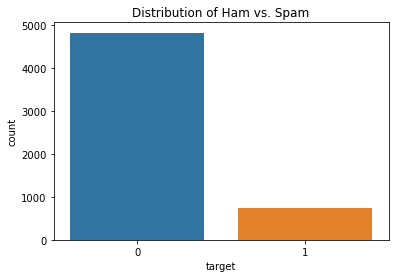

In [11]:
# Plot the distribution of ham vs. spam
sns.countplot(x='target', data=df)
plt.title('Distribution of Ham vs. Spam')
plt.show()

In [12]:
# ham is higher than spam

In [13]:
# Generate word clouds
spam_words = ' '.join(df[df['target'] == 1]['Message '])
ham_words = ' '.join(df[df['target'] == 0]['Message '])

In [14]:
spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)
ham_wordcloud = WordCloud(width=600, height=400).generate(ham_words)

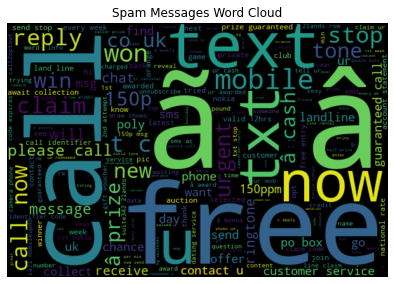

In [15]:
# Display the word clouds
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Messages Word Cloud')
plt.axis('off')
plt.show()

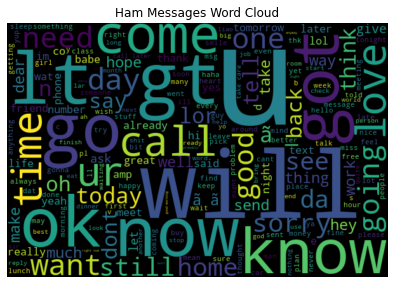

In [16]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Messages Word Cloud')
plt.axis('off')
plt.show()

## 5. Data Modeling

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [22]:
# Initialize models
nb = MultinomialNB()


In [23]:
# Train models
nb.fit(X_train, y_train)

MultinomialNB()

In [24]:
# Evaluate models
nb_predictions = nb.predict(X_test)


In [25]:
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_predictions))

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1453
           1       1.00      0.75      0.86       219

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.97      1672



In [26]:
import joblib

# Save the model
joblib.dump(nb, 'spam_detector_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']